In [1]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 788.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 3.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=cae956398f696b69538505f1a232c810b15626b89477e7d8b0592f3a73e4c0e7
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypar

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="IoW9RULGCBop9rPCmD0V")
project = rf.workspace().project("bird-mv9br")
model = project.version(2).model


loading Roboflow workspace...
loading Roboflow project...


{'predictions': [{'x': 369.0, 'y': 243.0, 'width': 116.0, 'height': 242.0, 'confidence': 0.6399048566818237, 'class': 'bird', 'image_path': 'gfg.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 270.0, 'y': 226.5, 'width': 110.0, 'height': 217.0, 'confidence': 0.523145318031311, 'class': 'bird', 'image_path': 'gfg.png', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '612', 'height': '408'}}


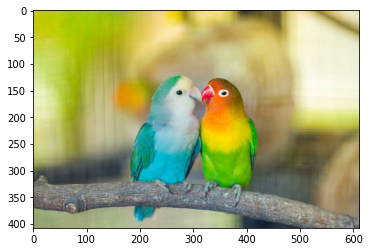

In [18]:

# infer on a local image
from PIL import Image
import urllib.request
from matplotlib import pyplot as plt
urllib.request.urlretrieve(
  'https://media.istockphoto.com/id/696478774/photo/lovebird-kiss.jpg?s=612x612&w=0&k=20&c=fTD5Z3ozRWRzkkitL3hhJejSwbf_ZXZyktgxVMOJd4I=',
   "gfg.png")
# img_p = 'https://t4.ftcdn.net/jpg/01/77/47/67/360_F_177476718_VWfYMWCzK32bfPI308wZljGHvAUYSJcn.jpg'
img = Image.open("gfg.png")
plt.imshow(img)
# img = "https://t4.ftcdn.net/jpg/01/77/47/67/360_F_177476718_VWfYMWCzK32bfPI308wZljGHvAUYSJcn.jpg"
print(model.predict("gfg.png", confidence=40, overlap=30).json())

# model.predict(img, confidence=40, overlap=30).save("prediction.jpg")

In [19]:
model.predict("gfg.png", confidence=40, overlap=30).save("prediction.jpg")

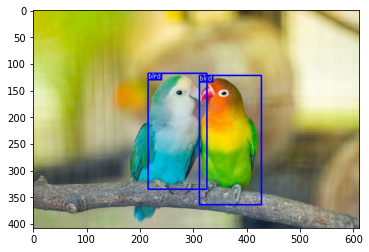

In [20]:
res= Image.open("prediction.jpg")
plt.imshow(res)